# Import libraries and load dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://raw.githubusercontent.com/kaiyungtan/challenge-data-analysis/master/data/clean/belgium_real_estate.csv"

df = pd.read_csv(url,index_col=0)
 
df.head()


postal_code city_name  ...            province     region
0         1050   Ixelles  ...  Bruxelles-Capitale  Bruxelles
1         1050   Ixelles  ...  Bruxelles-Capitale  Bruxelles
2         1050   Ixelles  ...  Bruxelles-Capitale  Bruxelles
3         1050   Ixelles  ...  Bruxelles-Capitale  Bruxelles
4         1050   Ixelles  ...  Bruxelles-Capitale  Bruxelles

[5 rows x 18 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40395 entries, 0 to 40394
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   postal_code             40395 non-null  int64  
 1   city_name               40395 non-null  object 
 2   type_of_property        40395 non-null  int64  
 3   price                   40395 non-null  int64  
 4   number_of_rooms         40395 non-null  int64  
 5   house_area              40395 non-null  int64  
 6   fully_equipped_kitchen  40395 non-null  int64  
 7   open_fire               40395 non-null  int64  
 8   terrace                 40395 non-null  int64  
 9   garden                  40395 non-null  int64  
 10  surface_of_the_land     40395 non-null  int64  
 11  number_of_facades       40395 non-null  int64  
 12  swimming_pool           40395 non-null  int64  
 13  state_of_the_building   40395 non-null  object 
 14  lattitude               40395 non-null

In [4]:
df.isna().sum()

postal_code               0
city_name                 0
type_of_property          0
price                     0
number_of_rooms           0
house_area                0
fully_equipped_kitchen    0
open_fire                 0
terrace                   0
garden                    0
surface_of_the_land       0
number_of_facades         0
swimming_pool             0
state_of_the_building     0
lattitude                 0
longitude                 0
province                  0
region                    0
dtype: int64

In [5]:
df.shape

(40395, 18)

In [6]:
df.describe()

postal_code  type_of_property  ...     lattitude     longitude
count  40395.000000      40395.000000  ...  40395.000000  40395.000000
mean    5195.044139          0.469241  ...      4.313450     50.853864
std     2979.185308          0.499059  ...      0.811989      0.325111
min     1000.000000          0.000000  ...      2.580670     49.508502
25%     2360.000000          0.000000  ...      3.714155     50.670189
50%     4630.000000          0.000000  ...      4.361195     50.870452
75%     8400.000000          1.000000  ...      4.849315     51.104485
max     9992.000000          1.000000  ...      6.300938     51.474352

[8 rows x 14 columns]

In [7]:
df.describe(include='object')

city_name state_of_the_building             province   region
count       40395                 40395                40395    40395
unique       1046                     7                   11        3
top     Antwerpen                as new  Flandre-Occidentale  Flandre
freq          886                 12096                 7235    24038

In [8]:
# rename columns lattitude --> longitude & longitude --> lattitude

df.rename(columns={'lattitude': 'longitude', 'longitude': 'lattitude'}, inplace=True)

# Data Intepretation




*  ### Which variable is the target ? 

  price



*  ### How many rows and columns ? 

  40395 rows & 18 columns




*  ###  How many qualitative and quantitative variable is there ? 

  There are 14 quantitative variables (or Numerical variables):

  * 12 discete quantitative variables (type int64) & 2 continuous quantitative variables (type float64).

  There are 4 qualitative variables (or Categorical variables)
  
    * type of all 4 qualitative variables are strings.



*  ### How would you transform these values into numerical values ?

    *  type_of_property initially was qualitative variable where house and apartment are the 2 values in the column. Transformation was done during cleaning data phrase where we have replace house : 0 & apartment :1



*  ### Percentage of missing values per column ?
    *  refer to step1_cleaning.ipynb for details

# Univariate Analysis


## Price

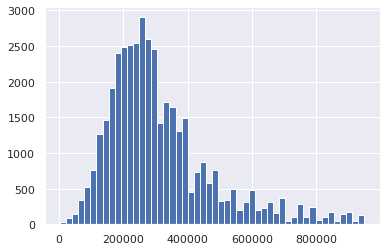

In [9]:
# check the distribution of the price

plt.hist(df['price'], bins=50);

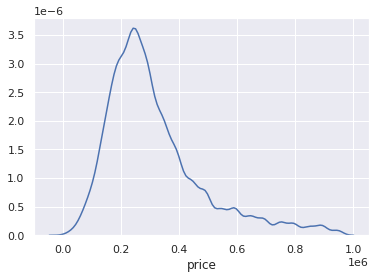

In [10]:
sns.distplot(df['price'], hist=False)

						 Mean:  314115   Median:  275000   Mode: 249000


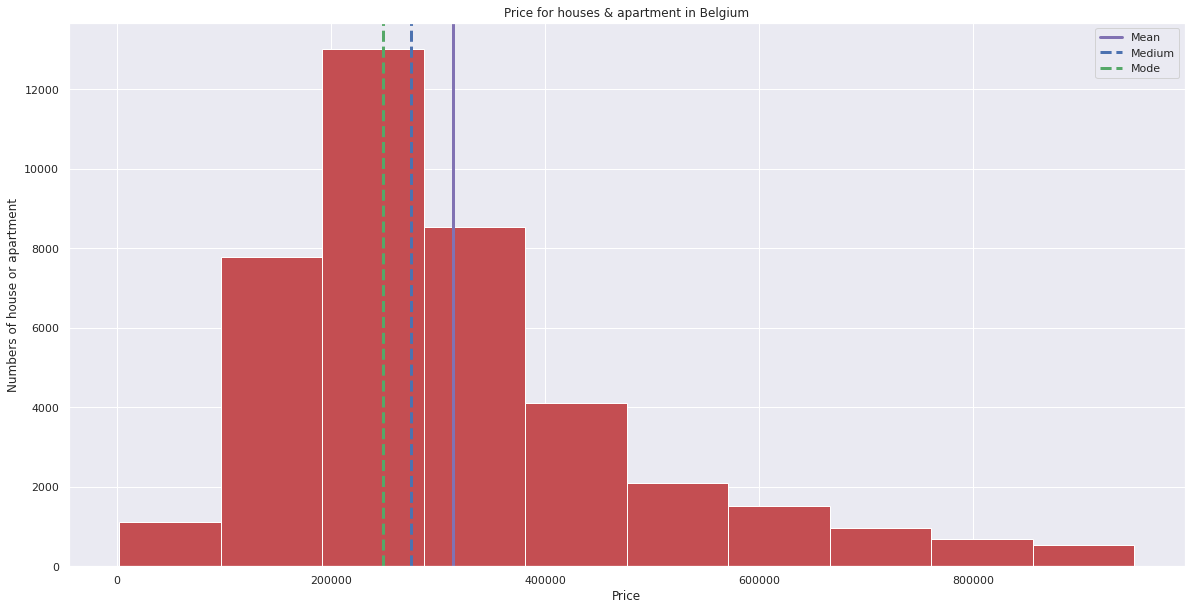

In [11]:
# closer look at the distribution by plotting a simple histogram with 10 bins.

plt.figure(figsize=(20,10));  # makes the plot wider
plt.hist(df['price'], color='r');  # plots a simple histogram
plt.axvline(df['price'].mean(), color='m', linewidth=3,label='Mean')  # draw a line for mean
plt.axvline(df['price'].median(), color='b', linestyle='dashed', linewidth=3,label='Medium') # draw a line for median
plt.axvline(df['price'].mode()[0], color='g', linestyle='dashed', linewidth=3,label='Mode') # draw a line for mode

plt.title('Price for houses & apartment in Belgium')
plt.xlabel('Price')    # label the x-axis
plt.ylabel('Numbers of house or apartment')    # label the y-axis
plt.legend()      # Plot the legend

mean=round(df['price'].mean())
median=round(df['price'].median())
mode=round(df['price'].mode())

print('\t\t\t\t\t\t Mean: ',mean,'  Median: ',median,'  Mode:',mode[0])


Observation: 


*   In the above histogram we can see that the third bin with the price between 200,000 to 300,000 has the most numbers of observation.
*   Majority  of the observations lie within the second to fourth bin.  
*   Mean is 314,115, Median is 275,000 & mode is 249,000 euro.

In [12]:
# create separate dataframe for house & apartment 


df_house = df[df['type_of_property'] == 0]

df_apartment = df[df['type_of_property'] == 1]


						 Mean:  332896   Median:  295000   Mode: 249000


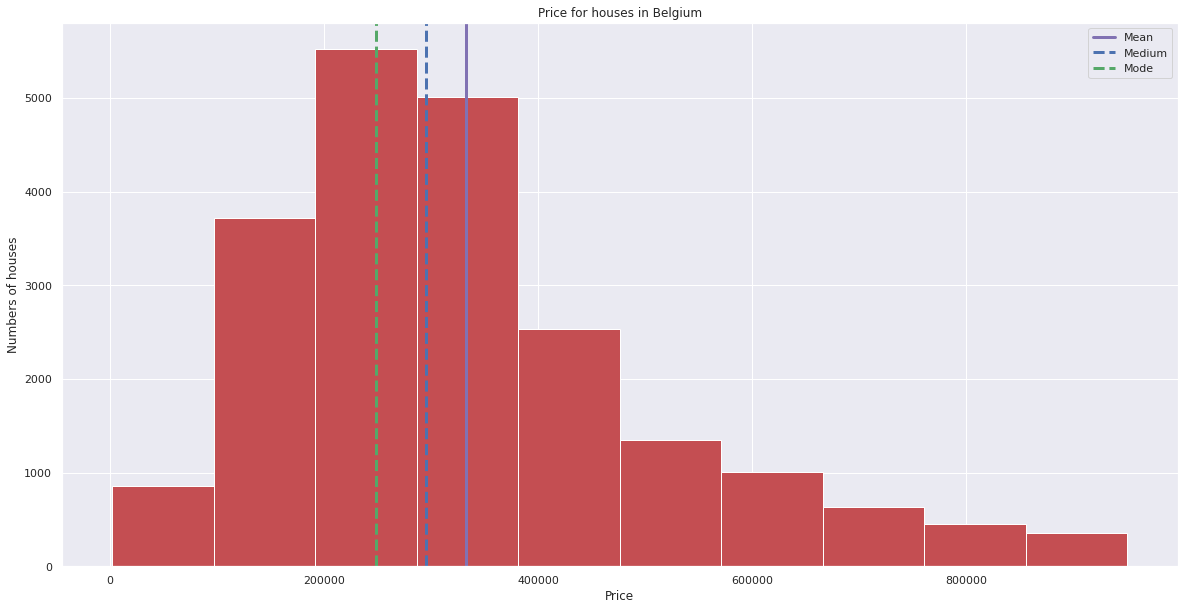

In [13]:
# plot histrogram for only houses

plt.figure(figsize=(20,10));  # makes the plot wider
plt.hist(df_house['price'], color='r');  # plots a simple histogram
plt.axvline(df_house['price'].mean(), color='m', linewidth=3,label='Mean')  # draw a line for mean
plt.axvline(df_house['price'].median(), color='b', linestyle='dashed', linewidth=3,label='Medium') # draw a line for median
plt.axvline(df_house['price'].mode()[0], color='g', linestyle='dashed', linewidth=3,label='Mode') # draw a line for mode

plt.title('Price for houses in Belgium')
plt.xlabel('Price')    # label the x-axis
plt.ylabel('Numbers of houses')    # label the y-axis
plt.legend()      # Plot the legend

mean=round(df_house['price'].mean())
median=round(df_house['price'].median())
mode=round(df_house['price'].mode())

print('\t\t\t\t\t\t Mean: ',mean,'  Median: ',median,'  Mode:',mode[0])


Observation: 


*   In the above histogram we can see that the third bin with the price between 200,000 to 300,000 has the most numbers of observation.
*   Majority  of the observations lie within the second to fifth bin.  
*   Mean is 332,896, Median is 295,000 & mode is 249,000 euro.

						 Mean:  292871   Median:  250000   Mode: 199000


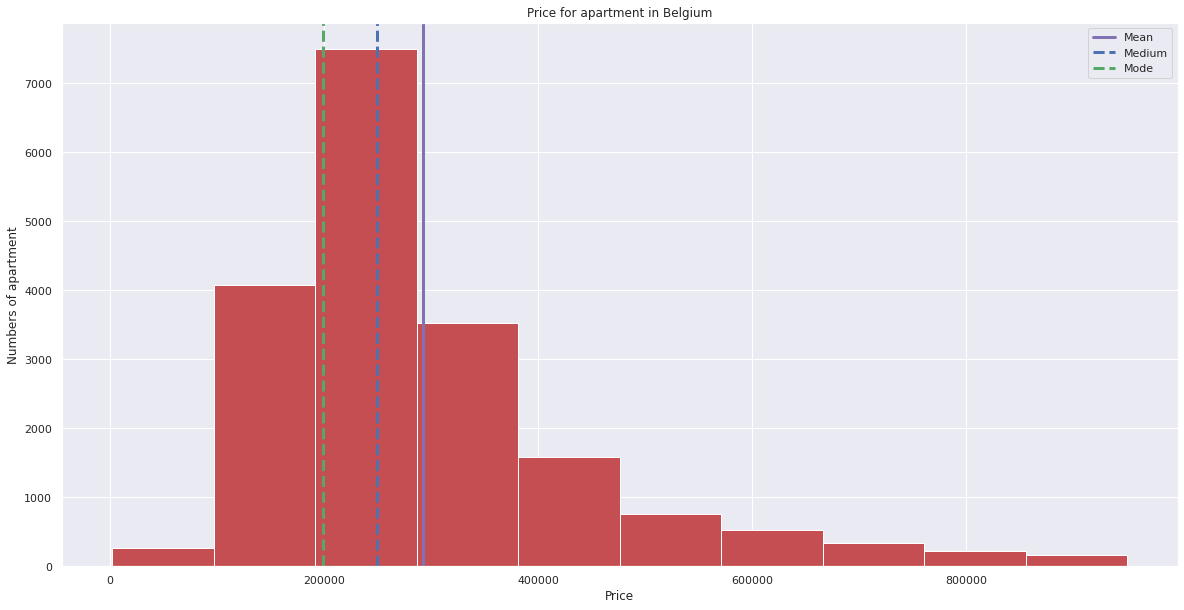

In [14]:
# plot histrogram for only apartment

plt.figure(figsize=(20,10));  # makes the plot wider
plt.hist(df_apartment['price'], color='r');  # plots a simple histogram
plt.axvline(df_apartment['price'].mean(), color='m', linewidth=3,label='Mean')  # draw a line for mean
plt.axvline(df_apartment['price'].median(), color='b', linestyle='dashed', linewidth=3,label='Medium') # draw a line for median
plt.axvline(df_apartment['price'].mode()[0], color='g', linestyle='dashed', linewidth=3,label='Mode') # draw a line for mode

plt.title('Price for apartment in Belgium')
plt.xlabel('Price')    # label the x-axis
plt.ylabel('Numbers of apartment')    # label the y-axis
plt.legend()      # Plot the legend

mean=round(df_apartment['price'].mean())
median=round(df_apartment['price'].median())
mode=round(df_apartment['price'].mode())

print('\t\t\t\t\t\t Mean: ',mean,'  Median: ',median,'  Mode:',mode[0])


In [15]:
# the different of mean,median & mode between house and aparment

print(round(df_house['price'].mean() - df_apartment['price'].mean()))
print(round(df_house['price'].median() - df_apartment['price'].mean()))
print(round(df_house['price'].mode()[0] - df_apartment['price'].mode()[0]))

40025
2129
50000


Observation: 

*   In the above histogram we can see that the third bin with the price between 200,000 to 300,000 has the most numbers of observation.
*   Majority  of the observations lie within the second to fourth bin.  
*   Mean is 292,871, Median is 250,000 & mode is 199,000 euro.
*   Comparing mean for house and apartment:
    * mean for houses is 40000  higher than apartment. 

*   Comparing median for house and apartment:
    * median for houses is 2129 higher than apartment

*   Comparing mode for house and apartment:
    * mode for houses is 50000 higher than apartment



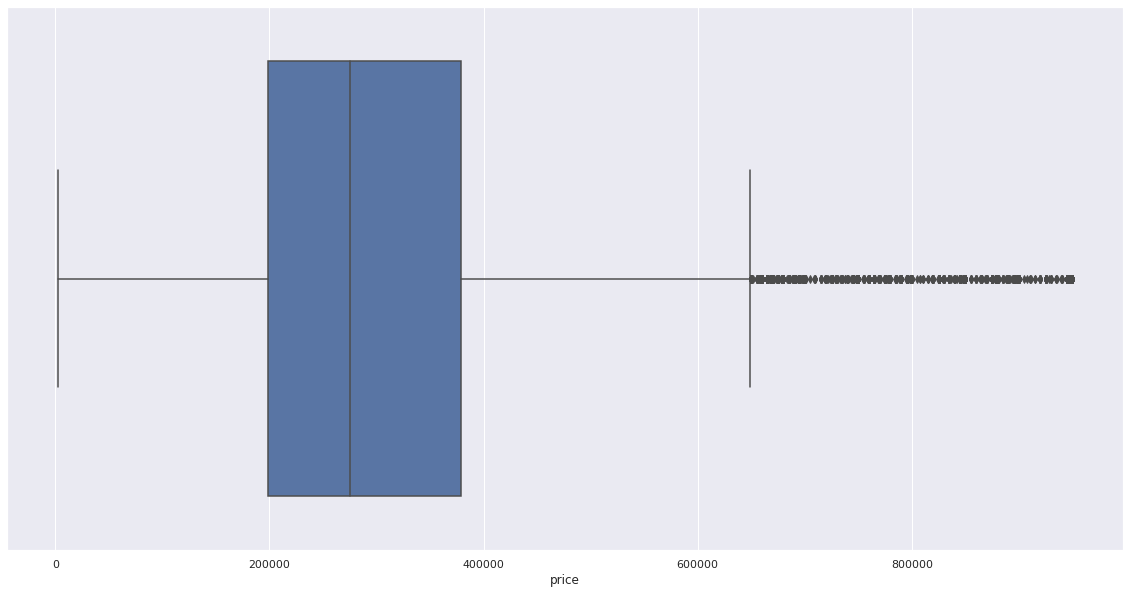

In [16]:
# Create boxplot for price

plt.figure(figsize=(20,10))
sns.boxplot(x=df["price"]);


Observation:

*   there are a lot of number of houses or aparments over 650,000 shows as outliers in the box plot.




## number_of_rooms

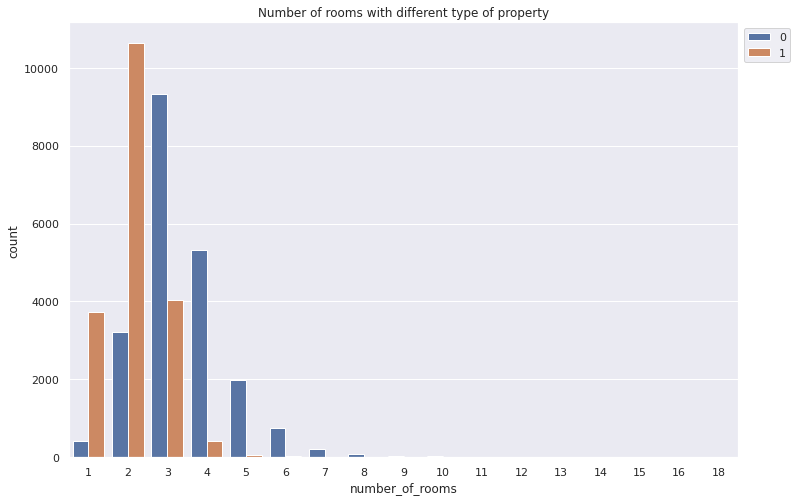

In [17]:
plt.subplots(figsize=(12, 8))   

sns.countplot(df['number_of_rooms'],hue=df['type_of_property'])

plt.title('Number of rooms with different type of property')

plt.legend(bbox_to_anchor=(1, 1))

## house_area

In [18]:
df['house_area'].describe()

count    40395.000000
mean       152.466320
std         95.649206
min          5.000000
25%         92.000000
50%        130.000000
75%        184.000000
max       3560.000000
Name: house_area, dtype: float64

In [19]:
filt = df['house_area'] > 3000
df[filt]

postal_code city_name  type_of_property  ...  lattitude  province   region
28619         2880    Bornem                 0  ...  51.092465    Anvers  Flandre

[1 rows x 18 columns]

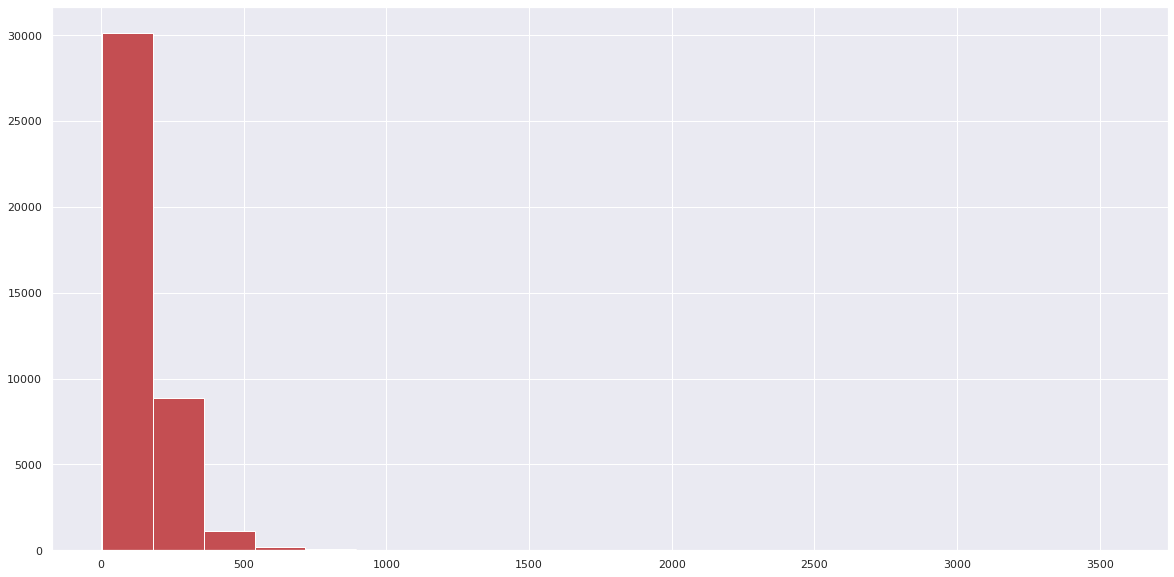

In [20]:
# plot histrogram for only apartment

plt.figure(figsize=(20,10));   
plt.hist(df['house_area'],bins=20 , color='r');   

## surface_of_the_land


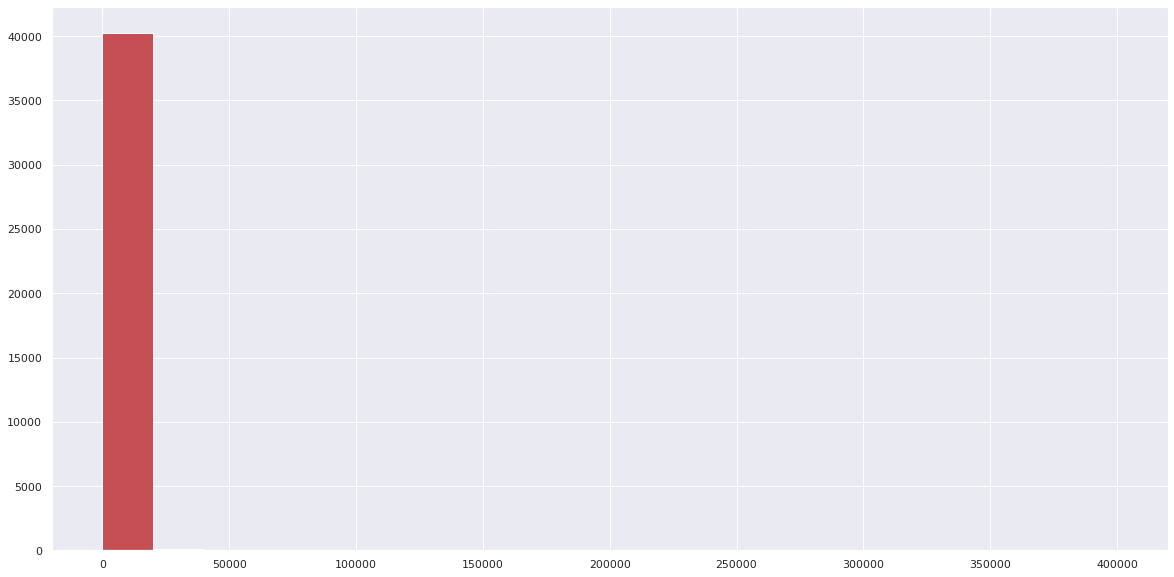

In [21]:
# histrogram for surface_of_the_land < 3000
plt.figure(figsize=(20,10));   
plt.hist(df['surface_of_the_land'],bins=20 , color='r');  

In [22]:
df.surface_of_the_land.sort_values()

20197         0
28742         0
28747         0
28760         0
28761         0
          ...  
23433    120000
36591    120000
21114    120300
18424    264781
27750    400000
Name: surface_of_the_land, Length: 40395, dtype: int64

In [23]:
df.surface_of_the_land.describe()

count     40395.000000
mean        545.840079
std        3609.242736
min           0.000000
25%           0.000000
50%           0.000000
75%         416.000000
max      400000.000000
Name: surface_of_the_land, dtype: float64

Commment : surface_of_the_land has highly right skewed distrubution. More than 50% of the observation has 0 surface of land while mean is 545.

In [24]:
# filter surface_of_the_land > 0 & surface_of_the_land < 3000

filt = (df.surface_of_the_land > 0) & (df.surface_of_the_land < 3000)
temp = df[filt]

In [25]:
temp.surface_of_the_land.describe()

count    18613.000000
mean       608.219793
std        576.941093
min          1.000000
25%        200.000000
50%        400.000000
75%        822.000000
max       2996.000000
Name: surface_of_the_land, dtype: float64

Text(0, 0.5, 'Count')

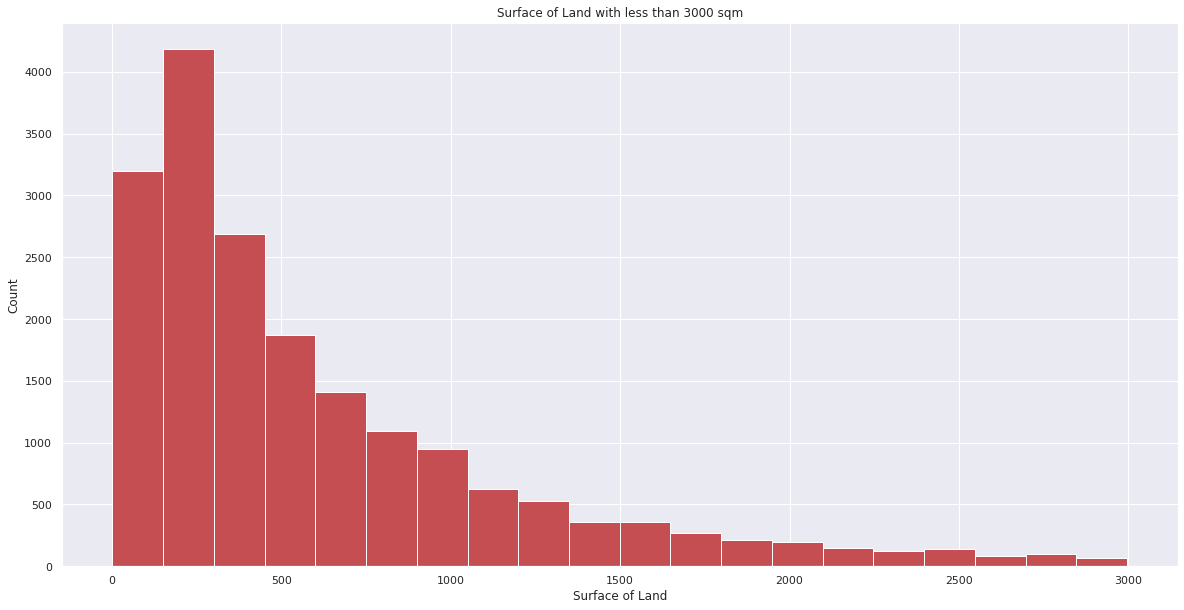

In [26]:
# histrogram for surface_of_the_land < 3000
plt.figure(figsize=(20,10));   
plt.hist(temp['surface_of_the_land'],bins=20 , color='r');   

plt.title('Surface of Land with less than 3000 sqm')
plt.xlabel('Surface of Land')    # label the x-axis
plt.ylabel('Count')    # label the y-axis

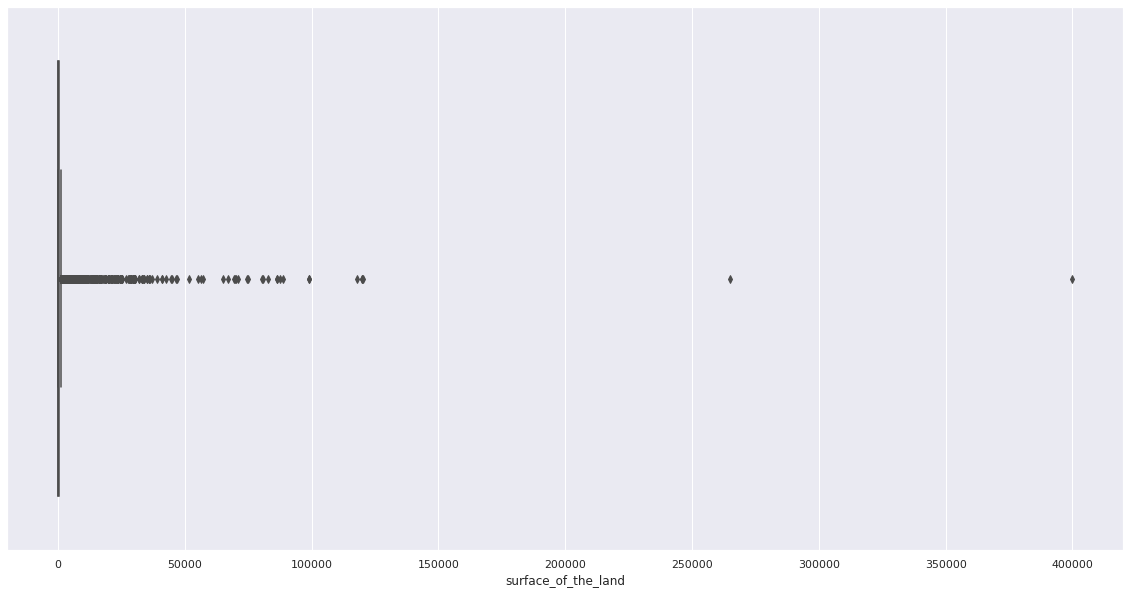

In [27]:
# Create boxplot for surface_of_the_land without filter

plt.figure(figsize=(20,10))
sns.boxplot(x=df["surface_of_the_land"]);

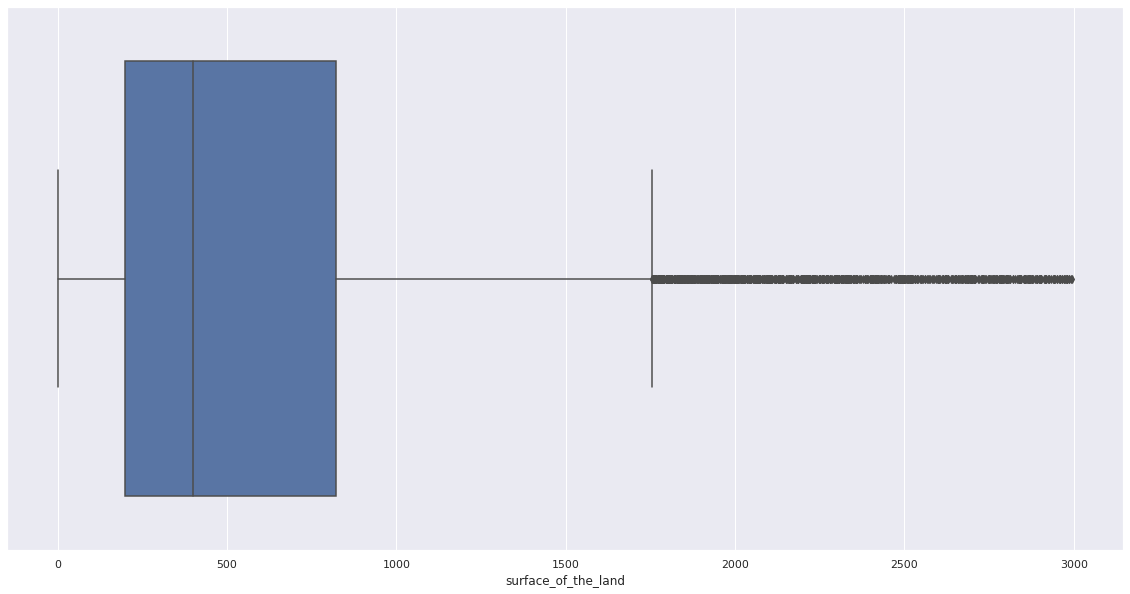

In [28]:
# Create boxplot for surface_of_the_land < 3000

plt.figure(figsize=(20,10))
sns.boxplot(x=temp["surface_of_the_land"]);

## state_of_the_building

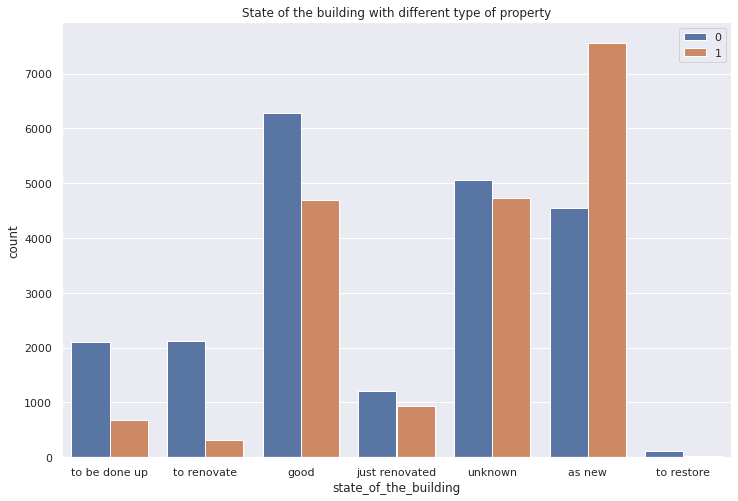

In [29]:
plt.subplots(figsize=(12, 8))   

sns.countplot(df['state_of_the_building'],hue=df['type_of_property'])

plt.title('State of the building with different type of property')

plt.legend(bbox_to_anchor=(1, 1))


# Bivariate Analysis

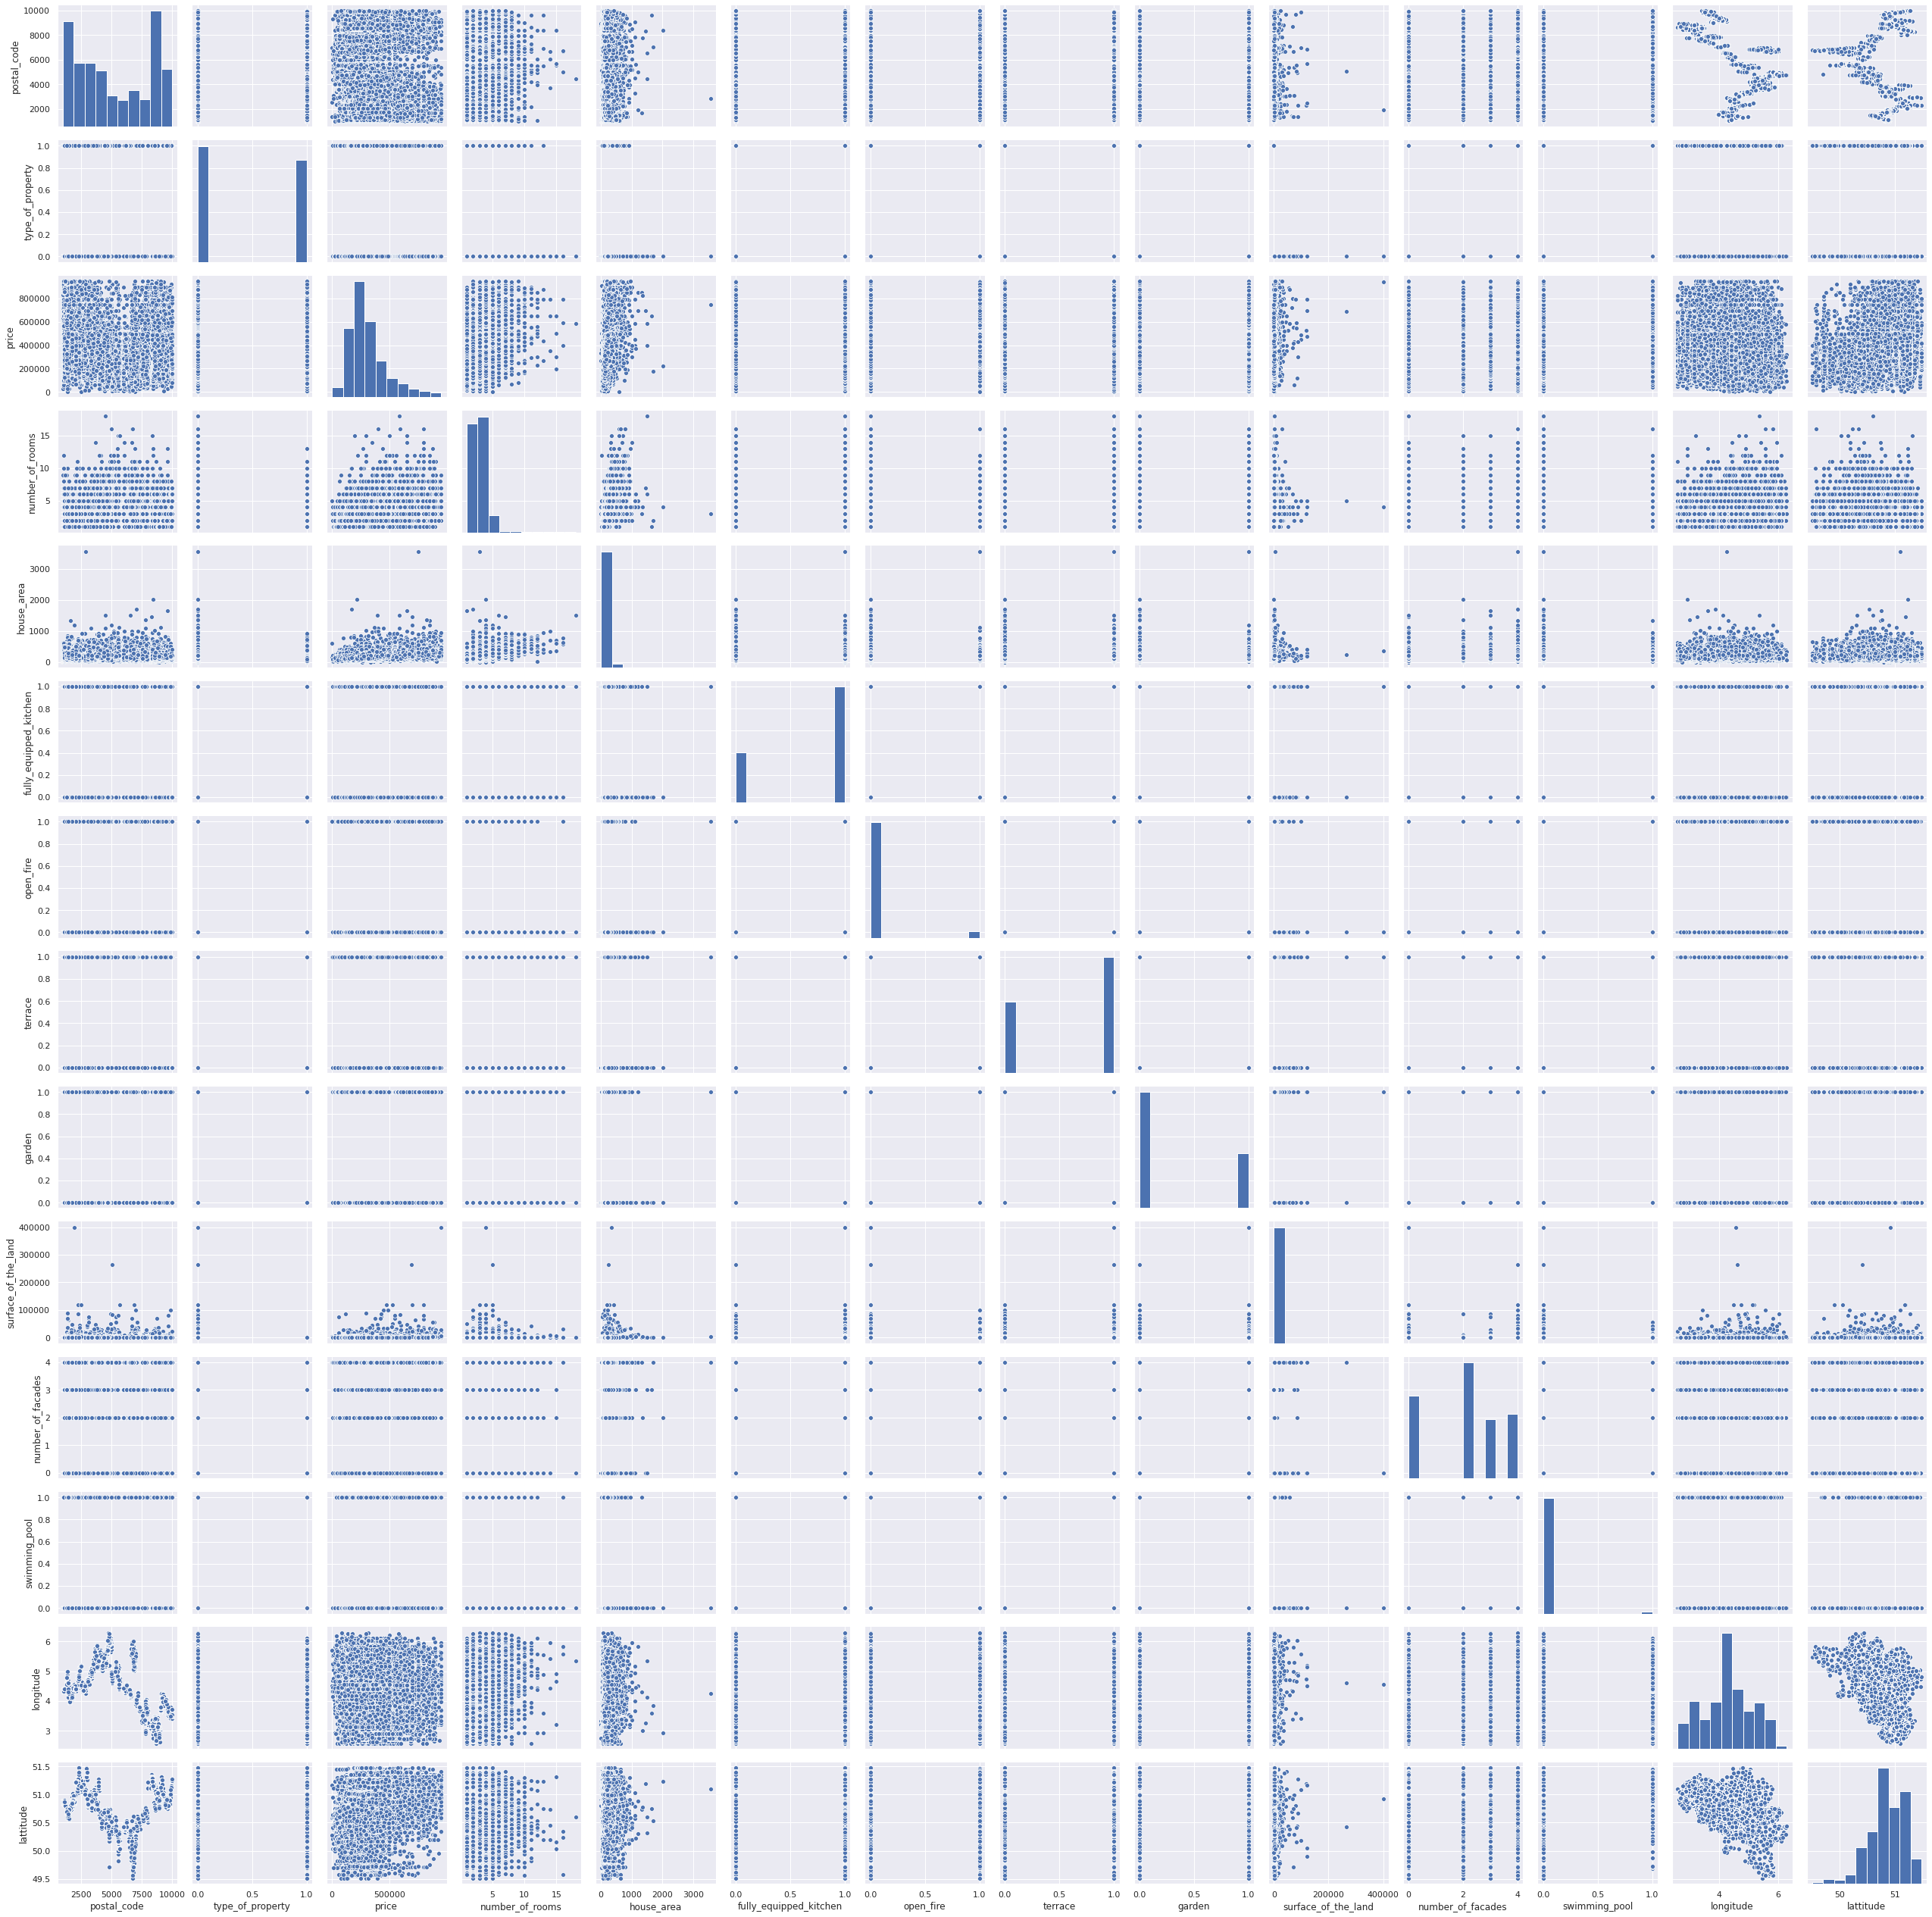

In [30]:
# plot pair plot

sns.pairplot(df) # plots scatter plots for every pair of attributes and histograms along the diagonal

In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. 

In [31]:
df.corr() # prints the correlation coefficient between every pair of attributes

postal_code  type_of_property  ...  longitude  lattitude
postal_code                1.000000         -0.056602  ...  -0.570451   0.038052
type_of_property          -0.056602          1.000000  ...  -0.157330   0.248653
price                     -0.131703         -0.118791  ...  -0.078736   0.208369
number_of_rooms           -0.017940         -0.543052  ...   0.128281  -0.164816
house_area                -0.014097         -0.497931  ...   0.101554  -0.108256
fully_equipped_kitchen    -0.102069         -0.012888  ...   0.060548  -0.085515
open_fire                 -0.037909         -0.157901  ...   0.043475  -0.066810
terrace                   -0.096574          0.135788  ...   0.045062  -0.009285
garden                     0.027099         -0.352253  ...   0.037440  -0.067247
surface_of_the_land       -0.004921         -0.142202  ...   0.053901  -0.060302
number_of_facades         -0.102367         -0.392999  ...   0.223357  -0.202303
swimming_pool             -0.015533         -0.058169  ...   0.019141  -0.020968
longitude                 -0.570451         -0.157330  ...   1.000000  -0.429051
lattitude                  0.038052          0.248653  ...  -0.429051   1.000000

[14 rows x 14 columns]

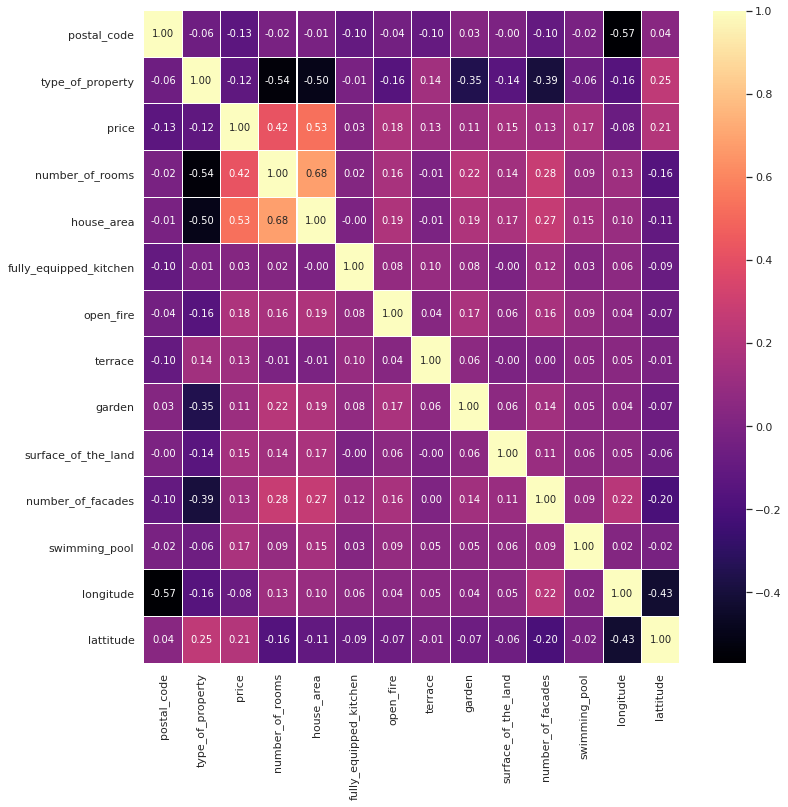

In [32]:
# plot heatmap checking for correlation

fig,ax = plt.subplots(figsize=(12, 12))   
headmap_plot = sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")  
plt.show()

figure = headmap_plot.get_figure()    
figure.savefig('Heatmap.png', dpi=100)

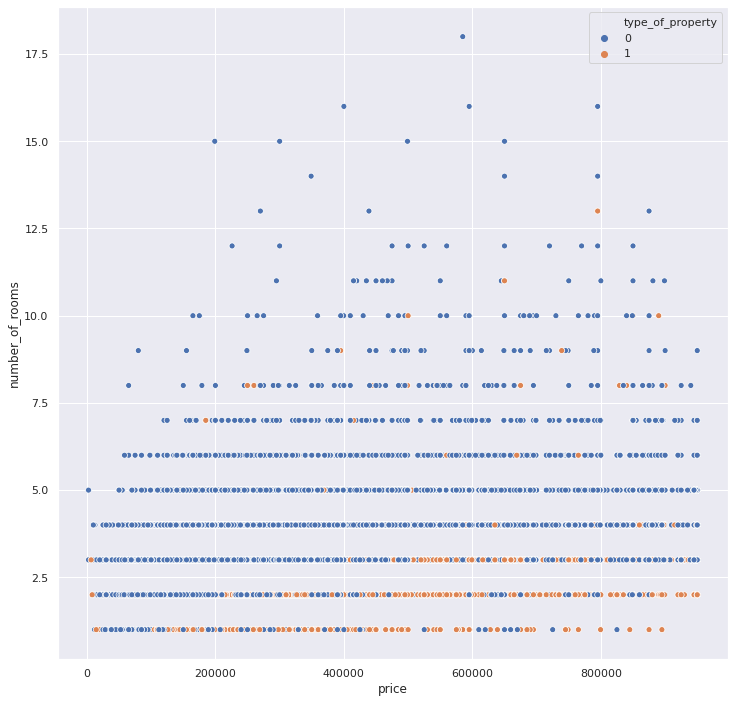

In [33]:
# check the relationship between number of rooms compare with the price
# type_of_property 0 : house , 1 : apartment
plt.subplots(figsize=(12, 12)) 
sns.scatterplot(df['price'], df['number_of_rooms'], hue=df['type_of_property']) 

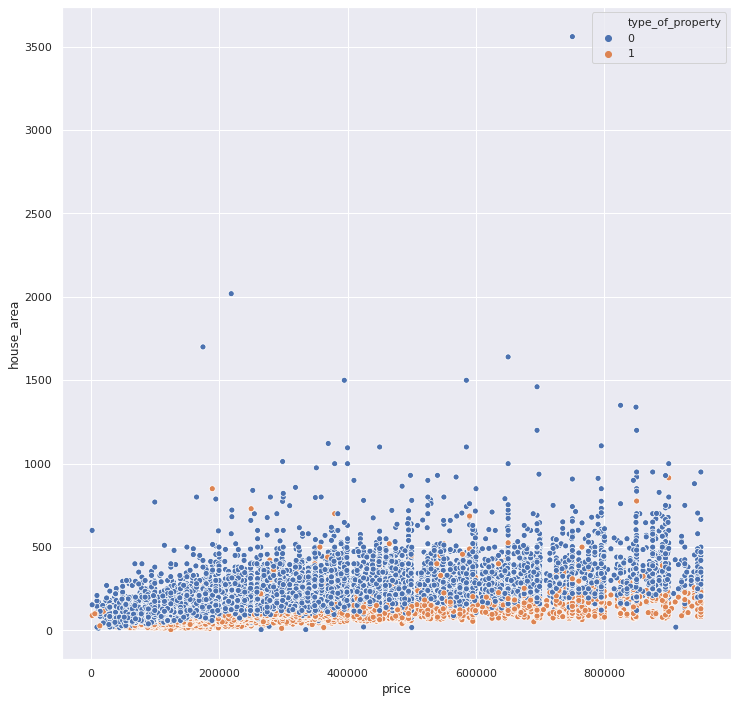

In [34]:
# check the relationship between house area compare with the price
# type_of_property 0 : house , 1 : apartment
plt.subplots(figsize=(12, 12)) 
sns.scatterplot(df['price'], df['house_area'], hue=df['type_of_property'])

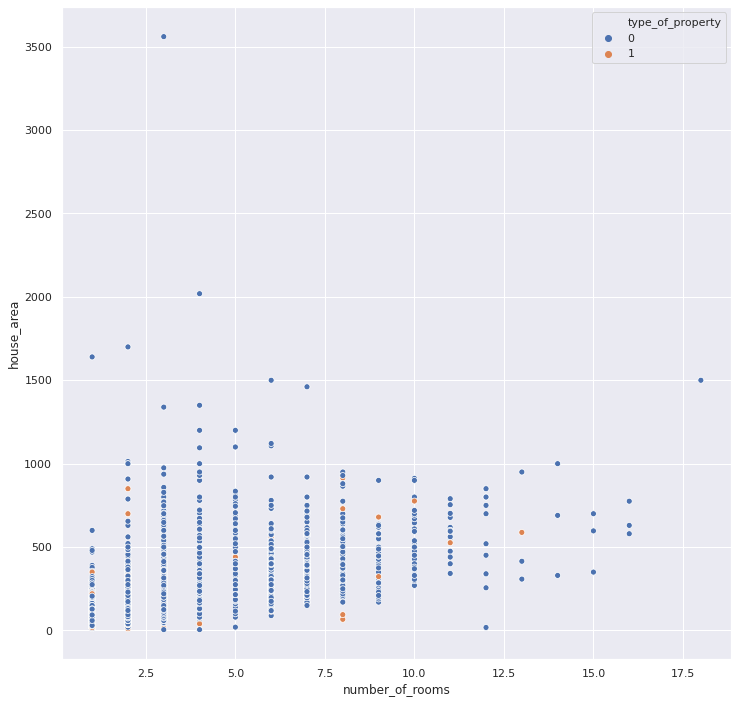

In [35]:
# check the relationship between house area compare with the price
# type_of_property 0 : house , 1 : apartment
plt.subplots(figsize=(12, 12)) 
sns.scatterplot(df['number_of_rooms'], df['house_area'], hue=df['type_of_property'])

# Data Intepretation

* ## What is the correlation between the variables/target ? (Why?)

    The target is the price of the house or apartemnt.
    
    House area has 0.53 positive correlation with price, whereas number of   rooms has 0.42 correlation with price. 
    
    House area and number of rooms could be important features to predict price. The rest of the variables has little correlation with price range from -0.13 to 0.21.

    The logical reason for these 2 variables positive correlation are larger house area and more rooms a house or an apartment has, the price will be more expensive.

    The rest of the variables has less significative correlative with price.

* ## What is the correlation between the variables/variables ? (Why?)

   The most significant positive correlation between variables are house area with  number of rooms (0.68). This could be explain by larger the area of the house, the more rooms could be built.
   
   The most significant negative correlation between variables are type of property with are number of rooms (-0.54) ,house area(-0.5), number of facades (-0.39) and garden(-0.35)

   



* ##  Which variables have the greatest influence on the target ?

   The greatest influence on the target is house area with 0.53 positive correlation.




* ## Which variables have the least influence on the target ?

   Fully equipped kitchen has the least influence on the target,only 0.03 correlation.



# For both house & apartment

### What are the most & less expensive municipalities in Belgium? (Average price, median price, price per square meter)

In [36]:
# create new column for price per square meter

df['price_sqm'] = df['price'] / df['house_area']

In [37]:
df.head()

postal_code city_name  ...     region    price_sqm
0         1050   Ixelles  ...  Bruxelles  1674.876847
1         1050   Ixelles  ...  Bruxelles  2600.000000
2         1050   Ixelles  ...  Bruxelles  3743.750000
3         1050   Ixelles  ...  Bruxelles  3743.750000
4         1050   Ixelles  ...  Bruxelles  3362.573099

[5 rows x 19 columns]

In [38]:
# most & less expensive municipalities in Belgium by average price/square meter

df.groupby('city_name')['price_sqm'].agg('mean').sort_values() 
 

city_name
Beauwelz         350.000000
Focant           390.243902
Nollevaux        421.212121
Attre            560.424679
Roucourt         657.142857
                   ...     
Heverlee        4148.311309
Leuven          4600.957816
Ramskapelle     4697.122149
Knokke          5924.335983
Westouter      19671.523810
Name: price_sqm, Length: 1046, dtype: float64

In [39]:
filt = df['city_name'] == 'Westouter'

df[filt]

postal_code  city_name  ...   region     price_sqm
37284         8954  Westouter  ...  Flandre   2957.285714
37285         8954  Westouter  ...  Flandre   2957.285714
37286         8954  Westouter  ...  Flandre  53100.000000

[3 rows x 19 columns]

Comment:

house area for index 37286 in Westouter is only 5 square meter and hence the price per sq meter is 53100 which affect the average price per sq meter. drop this row (index 37286) in Westouter for more accurate average price per sq meter in Westouter.

In [40]:
# drop row 37286 as per comment above

df = df.drop(37286)

In [41]:
# most expensive city in Belgium

most_expensive = df.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()
most_expensive 

'Knokke'

In [42]:
filt = df['city_name'] == most_expensive 

average = df[filt]['price'].mean()
median = df[filt]['price'].median()
price_sqm = df[filt]['price_sqm'].mean()

print(f'The most expensive municipalities in Belgium is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')


The most expensive municipalities in Belgium is Knokke.
Average price : 568728.0866666667 , median :545000.0   price per square meter : 5924.335983074829


In [43]:
# less expensive city in Belgium

less_expensive = df.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

'Beauwelz'

In [44]:
filt = df['city_name'] == less_expensive 

average = df[filt]['price'].mean()
median = df[filt]['price'].median()
price_sqm = df[filt]['price_sqm'].mean()

print(f'The less expensive municipalities in Belgium is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Belgium is Beauwelz.
Average price : 70000.0 , median :70000.0   price per square meter : 350.0


## What are the most & less expensive municipalities in Wallonia? (Average price, median price, price per square meter)

In [45]:
# most expensive city in Wallonie

filt1 = df['region'] == 'Wallonie'

df_wallonie = df[filt1]

most_expensive = df_wallonie.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_wallonie['city_name'] == most_expensive 

average = df_wallonie[filt2]['price'].mean()
median = df_wallonie[filt2]['price'].median()
price_sqm = df_wallonie[filt2]['price_sqm'].mean()

print(f'The most expensive municipalities in Wallonie is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Wallonie is Louvain-La-Neuve.
Average price : 475838.71428571426 , median :490000.0   price per square meter : 3709.738165339578


In [46]:
# less expensive city in Wallonie

less_expensive = df_wallonie .groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

filt3 = df_wallonie['city_name'] == less_expensive 

average = df_wallonie[filt3]['price'].mean()
median = df_wallonie[filt3]['price'].median()
price_sqm = df_wallonie[filt3]['price_sqm'].mean()

print(f'The less expensive municipalities in Wallonie is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Wallonie is Beauwelz.
Average price : 70000.0 , median :70000.0   price per square meter : 350.0



## What are the most & less expensive municipalities in Flanders? (Average price, median price, price per square meter)

In [47]:
# most expensive city in Flanders

filt1 = df['region'] == 'Flandre'

df_flanders = df[filt1]

most_expensive = df_flanders.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_flanders['city_name'] == most_expensive 

average = df_flanders[filt2]['price'].mean()
median = df_flanders[filt2]['price'].median()
price_sqm = df_flanders[filt2]['price_sqm'].mean()

print(f'The most expensive municipalities in Flanders is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Flanders is Knokke.
Average price : 568728.0866666667 , median :545000.0   price per square meter : 5924.335983074829


In [48]:
# less expensive city in Flanders

less_expensive = df_flanders.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

filt3 = df_flanders['city_name'] == less_expensive 

average = df_flanders[filt3]['price'].mean()
median = df_flanders[filt3]['price'].median()
price_sqm = df_flanders[filt3]['price_sqm'].mean()

print(f'The less expensive municipalities in Flanders is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Flanders is Bossuit.
Average price : 220000.0 , median :220000.0   price per square meter : 698.4126984126984


## What are the most & less expensive municipalities in Brussels? (Average price, median price, price per square meter)

In [49]:
# most expensive municipalities in Brussels

filt1 = df['region'] == 'Bruxelles'

df_bruxelles = df[filt1]

most_expensive = df_bruxelles.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_bruxelles['city_name'] == most_expensive 

average = df_bruxelles[filt2]['price'].mean()
median = df_bruxelles[filt2]['price'].median()
price_sqm = df_bruxelles[filt2]['price_sqm'].mean()

print(f'The most expensive municipalities in Brussels is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Brussels is Ixelles.
Average price : 529083.4489164087 , median :500000.0   price per square meter : 3956.268385456423


In [50]:
 # less expensive city municipalities in Brussels

less_expensive = df_bruxelles.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

filt3 = df_bruxelles['city_name'] == less_expensive 

average = df_bruxelles[filt3]['price'].mean()
median = df_bruxelles[filt3]['price'].median()
price_sqm = df_bruxelles[filt3]['price_sqm'].mean()

print(f'The less expensive municipalities in Brussels is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Brussels is Molenbeek-Saint-Jean.
Average price : 261347.57992565056 , median :235000.0   price per square meter : 2227.022723707461


# For apartment only

## What are the most & less expensive municipalities in Belgium? (Average price, median price, price per square meter)

In [51]:
df_apartment = df[df['type_of_property'] == 1]
df_apartment.head()

postal_code city_name  ...     region    price_sqm
33         1050   Ixelles  ...  Bruxelles  4166.666667
34         1050   Ixelles  ...  Bruxelles  5270.270270
35         1050   Ixelles  ...  Bruxelles  4852.941176
36         1050   Ixelles  ...  Bruxelles  2666.666667
37         1050   Ixelles  ...  Bruxelles  4676.470588

[5 rows x 19 columns]

In [52]:
# most expensive city in Belgium for apartment

most_expensive = df_apartment.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt1 = df_apartment['city_name'] == most_expensive 

average = df_apartment[filt1]['price'].mean()
median = df_apartment[filt1]['price'].median()
price_sqm = df_apartment[filt1]['price_sqm'].mean()

print(f'The most expensive apartment municipalities in Belgium is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')


The most expensive apartment municipalities in Belgium is Knokke.
Average price : 550494.3406593406 , median :515000.0   price per square meter : 6363.917694600006


In [53]:
# less expensive city in Belgium for apartment

less_expensive = df_apartment.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmin() 

filt2 = df_apartment['city_name'] == less_expensive 

average = df_apartment[filt2]['price'].mean()
median = df_apartment[filt2]['price'].median()
price_sqm = df_apartment[filt2]['price_sqm'].mean()

print(f'The less expensive apartment municipalities in Belgium is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive apartment municipalities in Belgium is Villers-Sur-Semois.
Average price : 14500.0 , median :14500.0   price per square meter : 517.8571428571429



## What are the most & less expensive municipalities in Wallonia? (Average price, median price, price per square meter)

In [54]:
# most expensive city in Wallonie for apartment

filt1 = df_apartment['region'] == 'Wallonie'

df_wallonie = df_apartment[filt1]

most_expensive = df_wallonie.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_wallonie['city_name'] == most_expensive 

average = df_wallonie[filt2]['price'].mean()
median = df_wallonie[filt2]['price'].median()
price_sqm = df_wallonie[filt2]['price_sqm'].mean()

print(f'The most expensive municipalities in Wallonie for apartment is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Wallonie for apartment is La Hulpe.
Average price : 346000.0 , median :332500.0   price per square meter : 3898.2758363985013


investigate La Hulpe to find out if it is the most expensive city for apartment

In [55]:
df_wallonie.groupby('city_name')['price_sqm'].agg('mean').sort_values()

city_name
Villers-Sur-Semois        517.857143
Rosée                     646.551724
Jemappes                  706.521739
Chastrès                  733.644860
Torgny                    825.396825
                            ...     
Genval                   3589.651177
Couture-Saint-Germain    3608.499246
Ottignies                3633.228932
Louvain-La-Neuve         3881.633071
La Hulpe                 3898.275836
Name: price_sqm, Length: 303, dtype: float64

In [56]:
filt = df_wallonie['city_name'] == 'La Hulpe'

print(df_wallonie[filt]['price_sqm'].describe())

df_wallonie[filt]

count      12.000000
mean     3898.275836
std       759.457758
min      2692.307692
25%      3384.946950
50%      3799.019608
75%      4600.082713
max      4983.333333
Name: price_sqm, dtype: float64


postal_code city_name  ...    region    price_sqm
29663         1310  La Hulpe  ...  Wallonie  3461.538462
29664         1310  La Hulpe  ...  Wallonie  4983.333333
29665         1310  La Hulpe  ...  Wallonie  4836.065574
29666         1310  La Hulpe  ...  Wallonie  4538.461538
29667         1310  La Hulpe  ...  Wallonie  3045.977011
29668         1310  La Hulpe  ...  Wallonie  4105.882353
29669         1310  La Hulpe  ...  Wallonie  3764.705882
29670         1310  La Hulpe  ...  Wallonie  2692.307692
29671         1310  La Hulpe  ...  Wallonie  3833.333333
29672         1310  La Hulpe  ...  Wallonie  3577.586207
29673         1310  La Hulpe  ...  Wallonie  4784.946237
29674         1310  La Hulpe  ...  Wallonie  3155.172414

[12 rows x 19 columns]

comment : based on the 12 rows of data for La Hulpe for apartment , the average of 3898 /sqm seems correct. The apartement area range from 60-174 sqm which is normal.

In [57]:
filt = df_wallonie['city_name'] == 'Louvain-La-Neuve'

print(df_wallonie[filt]['price_sqm'].describe())

df_wallonie[filt]

count      32.000000
mean     3881.633071
std       437.123528
min      2931.034483
25%      3706.144722
50%      3874.269006
75%      4089.192810
max      5416.666667
Name: price_sqm, dtype: float64


postal_code         city_name  ...    region    price_sqm
31881         1348  Louvain-La-Neuve  ...  Wallonie  4257.142857
31882         1348  Louvain-La-Neuve  ...  Wallonie  4222.222222
31883         1348  Louvain-La-Neuve  ...  Wallonie  3888.888889
31884         1348  Louvain-La-Neuve  ...  Wallonie  3736.111111
31885         1348  Louvain-La-Neuve  ...  Wallonie  4044.117647
31886         1348  Louvain-La-Neuve  ...  Wallonie  3352.941176
31887         1348  Louvain-La-Neuve  ...  Wallonie  3734.177215
31888         1348  Louvain-La-Neuve  ...  Wallonie  3294.117647
31889         1348  Louvain-La-Neuve  ...  Wallonie  3281.250000
31890         1348  Louvain-La-Neuve  ...  Wallonie  3325.000000
31891         1348  Louvain-La-Neuve  ...  Wallonie  4385.542169
31892         1348  Louvain-La-Neuve  ...  Wallonie  3750.000000
31893         1348  Louvain-La-Neuve  ...  Wallonie  3772.727273
31894         1348  Louvain-La-Neuve  ...  Wallonie  4126.213592
31895         1348  Louvain-La-Neuve  ...  Wallonie  3947.368421
31896         1348  Louvain-La-Neuve  ...  Wallonie  3807.339450
31897         1348  Louvain-La-Neuve  ...  Wallonie  3859.649123
31898         1348  Louvain-La-Neuve  ...  Wallonie  4083.333333
31899         1348  Louvain-La-Neuve  ...  Wallonie  3550.949275
31900         1348  Louvain-La-Neuve  ...  Wallonie  3622.047244
31901         1348  Louvain-La-Neuve  ...  Wallonie  3897.637795
31902         1348  Louvain-La-Neuve  ...  Wallonie  4083.333333
31903         1348  Louvain-La-Neuve  ...  Wallonie  4305.992126
31904         1348  Louvain-La-Neuve  ...  Wallonie  3833.503650
31905         1348  Louvain-La-Neuve  ...  Wallonie  4023.284672
31906         1348  Louvain-La-Neuve  ...  Wallonie  2931.034483
31907         1348  Louvain-La-Neuve  ...  Wallonie  4198.098039
31908         1348  Louvain-La-Neuve  ...  Wallonie  4106.771242
31909         1348  Louvain-La-Neuve  ...  Wallonie  5416.666667
31910         1348  Louvain-La-Neuve  ...  Wallonie  3857.142857
31911         1348  Louvain-La-Neuve  ...  Wallonie  3911.097403
31912         1348  Louvain-La-Neuve  ...  Wallonie  3606.557377

[32 rows x 19 columns]

comment: the second most expenseive city for apartment in Wallonia is Louvain-La-Neuve where it has more apartment on sale ( 32 ) and the mean price per square meter is 3881 slightly lower than La Hulpe (3898). 

In [58]:
# less expensive city in Wallonie for apartment

less_expensive = df_wallonie.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

filt3 = df_wallonie['city_name'] == less_expensive 

average = df_wallonie[filt3]['price'].mean()
median = df_wallonie[filt3]['price'].median()
price_sqm = df_wallonie[filt3]['price_sqm'].mean()

print(f'The less expensive municipalities in Wallonie for apartment is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Wallonie for apartment is Villers-Sur-Semois.
Average price : 14500.0 , median :14500.0   price per square meter : 517.8571428571429



## What are the most & less expensive municipalities in Flanders? (Average price, median price, price per square meter)

In [59]:
# most expensive city in Flanders for apartment

filt1 = df_apartment['region'] == 'Flandre'

df_flanders = df_apartment[filt1]

most_expensive = df_flanders.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_flanders['city_name'] == most_expensive 

average = df_flanders[filt2]['price'].mean()
median = df_flanders[filt2]['price'].median()
price_sqm = df_flanders[filt2]['price_sqm'].mean()

print(f'The most expensive municipalities in Flanders is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Flanders is Knokke.
Average price : 550494.3406593406 , median :515000.0   price per square meter : 6363.917694600006


In [60]:
# less expensive city in Flanders for apartment

less_expensive = df_flanders.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

filt3 = df_flanders['city_name'] == less_expensive 

average = df_flanders[filt3]['price'].mean()
median = df_flanders[filt3]['price'].median()
price_sqm = df_flanders[filt3]['price_sqm'].mean()

print(f'The less expensive municipalities in Flanders is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Flanders is Kermt.
Average price : 229500.0 , median :229500.0   price per square meter : 1213.869463869464



## What are the most & less expensive municipalities in Brussels? (Average price, median price, price per square meter)



In [61]:
# most expensive municipalities in Brussels for apartment

filt1 = df_apartment['region'] == 'Bruxelles'

df_bruxelles = df_apartment[filt1]

most_expensive = df_bruxelles.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_bruxelles['city_name'] == most_expensive 

average = df_bruxelles[filt2]['price'].mean()
median = df_bruxelles[filt2]['price'].median()
price_sqm = df_bruxelles[filt2]['price_sqm'].mean()

print(f'The most expensive municipalities in Brussels is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Brussels is Auderghem.
Average price : 429326.92307692306 , median :392500.0   price per square meter : 4191.968437745178


In [62]:
# less expensive city municipalities in Brussels for apartment

less_expensive = df_bruxelles.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmin() 

filt3 = df_bruxelles['city_name'] == less_expensive 

average = df_bruxelles[filt3]['price'].mean()
median = df_bruxelles[filt3]['price'].median()
price_sqm = df_bruxelles[filt3]['price_sqm'].mean()

print(f'The less expensive municipalities in Brussels is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Brussels is Molenbeek-Saint-Jean.
Average price : 234724.44 , median :219000.0   price per square meter : 2288.214348586766


# For house only

In [63]:
df_house = df[df['type_of_property'] == 0]
df_house.head()

postal_code city_name  ...     region    price_sqm
0         1050   Ixelles  ...  Bruxelles  1674.876847
1         1050   Ixelles  ...  Bruxelles  2600.000000
2         1050   Ixelles  ...  Bruxelles  3743.750000
3         1050   Ixelles  ...  Bruxelles  3743.750000
4         1050   Ixelles  ...  Bruxelles  3362.573099

[5 rows x 19 columns]

In [64]:
df_house['surface_of_the_land'].describe()

count     21439.000000
mean       1028.445217
std        4903.952004
min           0.000000
25%         163.000000
50%         380.000000
75%         870.000000
max      400000.000000
Name: surface_of_the_land, dtype: float64

In [65]:
df_house['surface_of_the_land'].value_counts().sort_values()

1959       1
3885       1
1836       1
3869       1
1804       1
        ... 
300      144
1000     145
200      160
150      169
0       1796
Name: surface_of_the_land, Length: 2952, dtype: int64

In [66]:
filt = df_house['surface_of_the_land'] > 300000
df_house[filt]

postal_code       city_name  ...   region  price_sqm
27750         1910  Nederokkerzeel  ...  Flandre     2700.0

[1 rows x 19 columns]

comment : due to the surface of land has enormous number i.e 400,000. 
See link: https://www.immoweb.be/en/classified/villa/for-sale/kampenhout/1910/8805057

To calculate house price per sq meter, we will use the house area to calculate instead of surface of the land.

## What are the most & less expensive municipalities in Belgium? (Average price, median price, price per square meter)

In [67]:
# most expensive city in Belgium for house

most_expensive = df_house.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt1 = df_house['city_name'] == most_expensive 

average = df_house[filt1]['price'].mean()
median = df_house[filt1]['price'].median()
price_sqm = df_house[filt1]['price_sqm'].mean()

print(f'The most expensive municipalities in Belgium for house is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Belgium for house is Boutersem.
Average price : 443245.8333333333 , median :360000.0   price per square meter : 3750.529467335884


## What are the most & less expensive municipalities in Wallonia? (Average price, median price, price per square meter)

In [68]:
# most expensive city in Wallonie for house

filt1 = df_house['region'] == 'Wallonie'

df_wallonie = df_house[filt1]

most_expensive = df_wallonie.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_wallonie['city_name'] == most_expensive 

average = df_wallonie[filt2]['price'].mean()
median = df_wallonie[filt2]['price'].median()
price_sqm = df_wallonie[filt2]['price_sqm'].mean()

print(f'The most expensive municipalities in Wallonie for house is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Wallonie for house is Thines.
Average price : 550000.0 , median :550000.0   price per square meter : 3437.5


In [69]:
filt = df_house['city_name'] == 'Thines'
df_house[filt]

postal_code city_name  ...    region  price_sqm
32749         1402    Thines  ...  Wallonie     3437.5

[1 rows x 19 columns]

comment : Thines only one house on sale , and the avereage price/sqm is not representative. Consider drop this row (index 32749)

In [70]:
# drop row 32749 as per comment above

df = df.drop(32749)

In [71]:
df_house = df[df['type_of_property'] == 0]
df_house.head()

postal_code city_name  ...     region    price_sqm
0         1050   Ixelles  ...  Bruxelles  1674.876847
1         1050   Ixelles  ...  Bruxelles  2600.000000
2         1050   Ixelles  ...  Bruxelles  3743.750000
3         1050   Ixelles  ...  Bruxelles  3743.750000
4         1050   Ixelles  ...  Bruxelles  3362.573099

[5 rows x 19 columns]

In [72]:
# most expensive city in Wallonie for house

filt1 = df_house['region'] == 'Wallonie'

df_wallonie = df_house[filt1]

most_expensive = df_wallonie.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_wallonie['city_name'] == most_expensive 

average = df_wallonie[filt2]['price'].mean()
median = df_wallonie[filt2]['price'].median()
price_sqm = df_wallonie[filt2]['price_sqm'].mean()

print(f'The most expensive municipalities in Wallonie for house is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Wallonie for house is Louvain-La-Neuve.
Average price : 595200.0 , median :580000.0   price per square meter : 3159.6744656271494


In [73]:
# less expensive city in Wallonie for house

less_expensive = df_wallonie.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

filt3 = df_wallonie['city_name'] == less_expensive 

average = df_wallonie[filt3]['price'].mean()
median = df_wallonie[filt3]['price'].median()
price_sqm = df_wallonie[filt3]['price_sqm'].mean()

print(f'The less expensive municipalities in Wallonie for house is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Wallonie for house is Beauwelz.
Average price : 70000.0 , median :70000.0   price per square meter : 350.0



## What are the most & less expensive municipalities in Flanders? (Average price, median price, price per square meter)



In [74]:
# most expensive city in Flanders for house

filt1 = df_house['region'] == 'Flandre'

df_flanders = df_house[filt1]

most_expensive = df_flanders.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_flanders['city_name'] == most_expensive 

average = df_flanders[filt2]['price'].mean()
median = df_flanders[filt2]['price'].median()
price_sqm = df_flanders[filt2]['price_sqm'].mean()

print(f'The most expensive municipalities in Flanders for house is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Flanders for house is Boutersem.
Average price : 443245.8333333333 , median :360000.0   price per square meter : 3750.529467335884


In [75]:
# less expensive city in Flanders for house

less_expensive = df_flanders.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmin() 
less_expensive 

filt3 = df_flanders['city_name'] == less_expensive 

average = df_flanders[filt3]['price'].mean()
median = df_flanders[filt3]['price'].median()
price_sqm = df_flanders[filt3]['price_sqm'].mean()

print(f'The less expensive municipalities in Flanders for house is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Flanders for house is Bossuit.
Average price : 220000.0 , median :220000.0   price per square meter : 698.4126984126984


## What are the most & less expensive municipalities in Brussels? (Average price, median price, price per square meter)


In [76]:
# most expensive municipalities in Brussels for house
filt1 = df_house['region'] == 'Bruxelles'

df_bruxelles = df_house[filt1]

most_expensive = df_bruxelles.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmax()

filt2 = df_bruxelles['city_name'] == most_expensive 

average = df_bruxelles[filt2]['price'].mean()
median = df_bruxelles[filt2]['price'].median()
price_sqm = df_bruxelles[filt2]['price_sqm'].mean()

print(f'The most expensive municipalities in Brussels for house is {most_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The most expensive municipalities in Brussels for house is Watermael-Boitsfort.
Average price : 637965.5172413794 , median :595000.0   price per square meter : 3426.3137471603595


In [77]:
# less expensive city municipalities in Brussels for house

less_expensive = df_bruxelles.groupby('city_name')['price_sqm'].agg('mean').sort_values().idxmin() 

filt3 = df_bruxelles['city_name'] == less_expensive 

average = df_bruxelles[filt3]['price'].mean()
median = df_bruxelles[filt3]['price'].median()
price_sqm = df_bruxelles[filt3]['price_sqm'].mean()

print(f'The less expensive municipalities in Brussels for house is {less_expensive}.')
print(f'Average price : {average} , median :{median}   price per square meter : {price_sqm}')

The less expensive municipalities in Brussels for house is Koekelberg.
Average price : 377500.0 , median :330000.0   price per square meter : 1725.2076967719045


# Map

## For House & Apartment

In [78]:
df_map = df[['city_name','price_sqm']]

In [79]:
df_map.head()

city_name    price_sqm
0   Ixelles  1674.876847
1   Ixelles  2600.000000
2   Ixelles  3743.750000
3   Ixelles  3743.750000
4   Ixelles  3362.573099

In [80]:
# get average price/sqm for each city

cols = [ val for val in df_map.columns]
temp = pd.concat([df_map.groupby(['city_name'])[cols].mean()],axis=1).reset_index()
temp 
   

city_name    price_sqm
0     's Gravenwezel  2547.155452
1            Aalbeke  1193.970020
2              Aalst  2074.773910
3             Aalter  2585.573222
4          Aartrijke  2079.546582
...              ...          ...
1040        Zonhoven  1869.315520
1041           Zulte  2002.415388
1042       Zutendaal  2664.922564
1043        Zwevegem  1929.864560
1044      Zwijnaarde  2704.736074

[1045 rows x 2 columns]

In [81]:
# merging city other information

df_map1 = df[['region','province','city_name','longitude','lattitude']]
 
df_map2 = pd.merge(temp,df_map1,on='city_name',how='inner')

# drop duplicates results
df_map2.drop_duplicates(inplace=True)
df_map2

city_name    price_sqm  ... longitude  lattitude
0      's Gravenwezel  2547.155452  ...  4.555604  51.262486
36            Aalbeke  1193.970020  ...  3.218605  50.777455
44              Aalst  2074.773910  ...  4.039642  50.942976
333            Aalter  2585.573222  ...  3.417680  51.088195
420         Aartrijke  2079.546582  ...  3.091327  51.118000
...               ...          ...  ...       ...        ...
40202        Zonhoven  1869.315520  ...  5.367768  50.990983
40271           Zulte  2002.415388  ...  3.448563  50.920664
40306       Zutendaal  2664.922564  ...  5.572555  50.931899
40338        Zwevegem  1929.864560  ...  3.341907  50.804070
40379      Zwijnaarde  2704.736074  ...  3.702179  51.000922

[1050 rows x 6 columns]

In [82]:
# checking duplicated city_name

df_map2[df_map2.duplicated(['city_name'], keep=False)]

city_name    price_sqm  ... longitude  lattitude
3955    Berchem  2444.469474  ...  4.431703  51.191849
4102    Berchem  2444.469474  ...  3.508267  50.790392
4457    Beveren  2215.814609  ...  3.144160  50.968731
4692    Beveren  2215.814609  ...  3.342747  50.871701
10041    Deurne  2166.443493  ...  5.096457  51.039238
10092    Deurne  2166.443493  ...  4.469525  51.211528
16427     Halle  2424.702593  ...  4.645557  51.242845
16464     Halle  2424.702593  ...  4.237435  50.736052
20222  Kapellen  2401.067065  ...  4.431232  51.332759
20282  Kapellen  2401.067065  ...  4.960878  50.887345

[10 rows x 6 columns]

In [83]:
# drop duplicated city name with different province name
df_map2 = df_map2.drop([4102,4692,10092,16464,20282])

In [84]:
df_map2.shape

(1045, 6)

In [85]:
import folium

In [86]:
df_map2.price_sqm.sort_values(ascending=True)

3573      350.000000
12678     390.243902
29143     421.212121
2819      560.424679
32452     657.142857
            ...     
19279    3956.268385
18259    4148.311309
23160    4600.957816
31629    4697.122149
20742    5924.335983
Name: price_sqm, Length: 1045, dtype: float64

In [87]:
# divide price_sqm to 3 range (0-2000),(2001-4000)(4001 & above)

filt1 = df_map2.price_sqm <= 2000
filt2 = (df_map2.price_sqm > 2000) & (df_map2.price_sqm < 4000)
filt3 = df_map2.price_sqm > 4000

df_map2_below_2000 = df_map2[filt1]
df_map2_2000_4000 = df_map2[filt2]
df_map2_above_4000 = df_map2[filt3]

In [88]:
m = folium.Map(location=[0,0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=15, zoom_start=1)

for i in range(0, len(df_map2_below_2000)):
    folium.Circle(
        location=[df_map2_below_2000.iloc[i]['lattitude'], df_map2_below_2000.iloc[i]['longitude']],
        color='blue',
        fill=True,
        fill_color='blue',
        tooltip =   '<li><bold>Region : '+str(df_map2_below_2000.iloc[i]['region'])+
                    '<li><bold>Province : '+str(df_map2_below_2000.iloc[i]['province'])+
                    '<li><bold>City Name : '+str(df_map2_below_2000.iloc[i]['city_name'])+
                    '<li><bold>Price_sqm : '+str(df_map2_below_2000.iloc[i]['price_sqm']),
                  
        radius=int(df_map2_below_2000.iloc[i]['price_sqm']**0.8)).add_to(m)

for i in range(0, len(df_map2_2000_4000)):
    folium.Circle(
        location=[df_map2_2000_4000.iloc[i]['lattitude'], df_map2_2000_4000.iloc[i]['longitude']],
        color='green',
        fill=True,
        fill_color='green',
        tooltip =   '<li><bold>Region : '+str(df_map2_2000_4000.iloc[i]['region'])+
                    '<li><bold>Province : '+str(df_map2_2000_4000.iloc[i]['province'])+
                    '<li><bold>City Name : '+str(df_map2_2000_4000.iloc[i]['city_name'])+
                    '<li><bold>Price_sqm : '+str(df_map2_2000_4000.iloc[i]['price_sqm']),
                  
        radius=int(df_map2_2000_4000.iloc[i]['price_sqm']**0.8)).add_to(m)


for i in range(0, len(df_map2_above_4000)):
    folium.Circle(
        location=[df_map2_above_4000.iloc[i]['lattitude'], df_map2_above_4000.iloc[i]['longitude']],
        color='red',
        fill=True,
        fill_color='red',
        tooltip =   '<li><bold>Region : '+str(df_map2_above_4000.iloc[i]['region'])+
                    '<li><bold>Province : '+str(df_map2_above_4000.iloc[i]['province'])+
                    '<li><bold>City Name : '+str(df_map2_above_4000.iloc[i]['city_name'])+
                    '<li><bold>Price_sqm : '+str(df_map2_above_4000.iloc[i]['price_sqm']),
                  
        radius=int(df_map2_above_4000.iloc[i]['price_sqm']**0.8)).add_to(m)

m

In [89]:
m.save('average_price_per_sqm_belgium_house&apartment.html')

## For Apartment

In [90]:
df_map_apartment = df_apartment[['city_name','price_sqm']]

In [91]:
# get average price/sqm for each city

cols = [ val for val in df_map_apartment.columns]
temp = pd.concat([df_map_apartment.groupby(['city_name'])[cols].mean()],axis=1).reset_index()
temp 
   

city_name    price_sqm
0    's Gravenwezel  3291.178998
1             Aalst  2507.656390
2            Aalter  2611.213039
3         Aartrijke  2552.596857
4        Aartselaar  2847.632058
..              ...          ...
707        Zonhoven  2186.545043
708           Zulte  2307.215402
709       Zutendaal  2694.452144
710        Zwevegem  2674.249421
711      Zwijnaarde  3080.652587

[712 rows x 2 columns]

In [92]:
# merging city other information

df_map1 = df_apartment[['region','province','city_name','longitude','lattitude']]
 
df_map2 = pd.merge(temp,df_map1,on='city_name',how='inner')

# drop duplicates results
df_map2.drop_duplicates(inplace=True)
df_map2

city_name    price_sqm  ... longitude  lattitude
0      's Gravenwezel  3291.178998  ...  4.555604  51.262486
11              Aalst  2507.656390  ...  4.039642  50.942976
159            Aalter  2611.213039  ...  3.417680  51.088195
229         Aartrijke  2552.596857  ...  3.091327  51.118000
237        Aartselaar  2847.632058  ...  4.387024  51.133297
...               ...          ...  ...       ...        ...
18870        Zonhoven  2186.545043  ...  5.367768  50.990983
18894           Zulte  2307.215402  ...  3.448563  50.920664
18905       Zutendaal  2694.452144  ...  5.572555  50.931899
18933        Zwevegem  2674.249421  ...  3.341907  50.804070
18947      Zwijnaarde  3080.652587  ...  3.702179  51.000922

[716 rows x 6 columns]

In [93]:
# checking duplicated city_name

df_map2[df_map2.duplicated(['city_name'], keep=False)]

city_name    price_sqm   region             province  longitude  lattitude
1947   Berchem  2706.659842  Flandre               Anvers   4.431703  51.191849
2050   Berchem  2706.659842  Flandre    Flandre-Orientale   3.508267  50.790392
2165   Beveren  2237.340491  Flandre  Flandre-Occidentale   3.144160  50.968731
2270   Beveren  2237.340491  Flandre  Flandre-Occidentale   3.342747  50.871701
4522    Deurne  2323.500018  Flandre      Brabant flamand   5.096457  51.039238
4541    Deurne  2323.500018  Flandre               Anvers   4.469525  51.211528
7364     Halle  2867.616691  Flandre               Anvers   4.645557  51.242845
7369     Halle  2867.616691  Flandre      Brabant flamand   4.237435  50.736052

In [94]:
# drop duplicated city name with different province name
df_map2 = df_map2.drop([2050,2270,4541,7369])

In [95]:
df_map2.price_sqm.sort_values(ascending=True)

17331     517.857143
14846     646.551724
8777      706.521739
4143      733.644860
16135     825.396825
            ...     
10502    5035.075630
8091     5108.401332
15913    5173.076923
10598    5298.080939
9204     6363.917695
Name: price_sqm, Length: 712, dtype: float64

In [96]:
# divide price_sqm to 3 range (0-2000),(2001-4000)(4001 & above)

filt1 = df_map2.price_sqm <= 2000
filt2 = (df_map2.price_sqm > 2000) & (df_map2.price_sqm < 4000)
filt3 = df_map2.price_sqm > 4000

df_map2_below_2000 = df_map2[filt1]
df_map2_2000_4000 = df_map2[filt2]
df_map2_above_4000 = df_map2[filt3]

In [97]:
m_apartment = folium.Map(location=[0,0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=15, zoom_start=1)

for i in range(0, len(df_map2_below_2000)):
    folium.Circle(
        location=[df_map2_below_2000.iloc[i]['lattitude'], df_map2_below_2000.iloc[i]['longitude']],
        color='blue',
        fill=True,
        fill_color='blue',
        tooltip =   '<li><bold>Region : '+str(df_map2_below_2000.iloc[i]['region'])+
                    '<li><bold>Province : '+str(df_map2_below_2000.iloc[i]['province'])+
                    '<li><bold>City Name : '+str(df_map2_below_2000.iloc[i]['city_name'])+
                    '<li><bold>Price_sqm : '+str(df_map2_below_2000.iloc[i]['price_sqm']),
                  
        radius=int(df_map2_below_2000.iloc[i]['price_sqm']**0.8)).add_to(m_apartment)

for i in range(0, len(df_map2_2000_4000)):
    folium.Circle(
        location=[df_map2_2000_4000.iloc[i]['lattitude'], df_map2_2000_4000.iloc[i]['longitude']],
        color='green',
        fill=True,
        fill_color='green',
        tooltip =   '<li><bold>Region : '+str(df_map2_2000_4000.iloc[i]['region'])+
                    '<li><bold>Province : '+str(df_map2_2000_4000.iloc[i]['province'])+
                    '<li><bold>City Name : '+str(df_map2_2000_4000.iloc[i]['city_name'])+
                    '<li><bold>Price_sqm : '+str(df_map2_2000_4000.iloc[i]['price_sqm']),
                  
        radius=int(df_map2_2000_4000.iloc[i]['price_sqm']**0.8)).add_to(m_apartment)


for i in range(0, len(df_map2_above_4000)):
    folium.Circle(
        location=[df_map2_above_4000.iloc[i]['lattitude'], df_map2_above_4000.iloc[i]['longitude']],
        color='red',
        fill=True,
        fill_color='red',
        tooltip =   '<li><bold>Region : '+str(df_map2_above_4000.iloc[i]['region'])+
                    '<li><bold>Province : '+str(df_map2_above_4000.iloc[i]['province'])+
                    '<li><bold>City Name : '+str(df_map2_above_4000.iloc[i]['city_name'])+
                    '<li><bold>Price_sqm : '+str(df_map2_above_4000.iloc[i]['price_sqm']),
                  
        radius=int(df_map2_above_4000.iloc[i]['price_sqm']**0.8)).add_to(m_apartment)

m_apartment

In [98]:
m_apartment.save('average_price_per_sqm_belgium_apartment.html')

## For House

In [99]:
df_map_house = df_house[['city_name','price_sqm']]

In [100]:
# get average price/sqm for each city

cols = [ val for val in df_map_house.columns]
temp = pd.concat([df_map_house.groupby(['city_name'])[cols].mean()],axis=1).reset_index()
temp 

city_name    price_sqm
0     's Gravenwezel  2219.785091
1            Aalbeke  1193.970020
2              Aalst  1620.400809
3             Aalter  2479.997504
4          Aartrijke  1856.934688
...              ...          ...
1036        Zonhoven  1700.126441
1037           Zulte  1862.715382
1038       Zutendaal  2458.215506
1039        Zwevegem  1543.887224
1040      Zwijnaarde  2203.514056

[1041 rows x 2 columns]

In [101]:
# merging city other information

df_map1 = df_house[['region','province','city_name','longitude','lattitude']]
 
df_map2 = pd.merge(temp,df_map1,on='city_name',how='inner')

# drop duplicates results
df_map2.drop_duplicates(inplace=True)
df_map2

city_name    price_sqm  ... longitude  lattitude
0      's Gravenwezel  2219.785091  ...  4.555604  51.262486
25            Aalbeke  1193.970020  ...  3.218605  50.777455
33              Aalst  1620.400809  ...  4.039642  50.942976
174            Aalter  2479.997504  ...  3.417680  51.088195
191         Aartrijke  1856.934688  ...  3.091327  51.118000
...               ...          ...  ...       ...        ...
21332        Zonhoven  1700.126441  ...  5.367768  50.990983
21377           Zulte  1862.715382  ...  3.448563  50.920664
21401       Zutendaal  2458.215506  ...  5.572555  50.931899
21405        Zwevegem  1543.887224  ...  3.341907  50.804070
21432      Zwijnaarde  2203.514056  ...  3.702179  51.000922

[1046 rows x 6 columns]

In [102]:
# checking duplicated city_name

df_map2[df_map2.duplicated(['city_name'], keep=False)]

city_name    price_sqm  ... longitude  lattitude
2008    Berchem  2049.337512  ...  4.431703  51.191849
2052    Berchem  2049.337512  ...  3.508267  50.790392
2292    Beveren  2199.039267  ...  3.144160  50.968731
2422    Beveren  2199.039267  ...  3.342747  50.871701
5519     Deurne  1886.288609  ...  5.096457  51.039238
5551     Deurne  1886.288609  ...  4.469525  51.211528
9063      Halle  2024.195163  ...  4.645557  51.242845
9095      Halle  2024.195163  ...  4.237435  50.736052
11286  Kapellen  1992.561367  ...  4.431232  51.332759
11319  Kapellen  1992.561367  ...  4.960878  50.887345

[10 rows x 6 columns]

In [103]:
# drop duplicated city name with different province name
df_map2 = df_map2.drop([2052,2422,5551,9095,11319	])

In [104]:
df_map2.price_sqm.sort_values(ascending=True)

1762      350.000000
7016      390.243902
15726     421.212121
8486      482.758621
1254      560.424679
            ...     
15763    3333.069628
20878    3419.049762
20303    3426.313747
11538    3446.339963
3769     3750.529467
Name: price_sqm, Length: 1041, dtype: float64

In [105]:
# divide price_sqm to 3 range (0-1500),(1501-3000)(3001 & above)

filt1 = df_map2.price_sqm <= 1500
filt2 = (df_map2.price_sqm > 1500) & (df_map2.price_sqm < 3000)
filt3 = df_map2.price_sqm > 3000

df_map2_below_1500 = df_map2[filt1]
df_map2_1500_3000 = df_map2[filt2]
df_map2_above_3001 = df_map2[filt3]

In [106]:
m_house = folium.Map(location=[0,0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=15, zoom_start=1)

for i in range(0, len(df_map2_below_1500)):
    folium.Circle(
        location=[df_map2_below_1500.iloc[i]['lattitude'], df_map2_below_1500.iloc[i]['longitude']],
        color='blue',
        fill=True,
        fill_color='blue',
        tooltip =   '<li><bold>Region : '+str(df_map2_below_1500.iloc[i]['region'])+
                    '<li><bold>Province : '+str(df_map2_below_1500.iloc[i]['province'])+
                    '<li><bold>City Name : '+str(df_map2_below_1500.iloc[i]['city_name'])+
                    '<li><bold>Price_sqm : '+str(df_map2_below_1500.iloc[i]['price_sqm']),
                  
        radius=int(df_map2_below_1500.iloc[i]['price_sqm']**0.8)).add_to(m_house)

for i in range(0, len(df_map2_1500_3000)):
    folium.Circle(
        location=[df_map2_1500_3000.iloc[i]['lattitude'], df_map2_1500_3000.iloc[i]['longitude']],
        color='green',
        fill=True,
        fill_color='green',
        tooltip =   '<li><bold>Region : '+str(df_map2_1500_3000.iloc[i]['region'])+
                    '<li><bold>Province : '+str(df_map2_1500_3000.iloc[i]['province'])+
                    '<li><bold>City Name : '+str(df_map2_1500_3000.iloc[i]['city_name'])+
                    '<li><bold>Price_sqm : '+str(df_map2_1500_3000.iloc[i]['price_sqm']),
                  
        radius=int(df_map2_1500_3000.iloc[i]['price_sqm']**0.8)).add_to(m_house)


for i in range(0, len(df_map2_above_3001)):
    folium.Circle(
        location=[df_map2_above_3001.iloc[i]['lattitude'], df_map2_above_3001.iloc[i]['longitude']],
        color='red',
        fill=True,
        fill_color='red',
        tooltip =   '<li><bold>Region : '+str(df_map2_above_3001.iloc[i]['region'])+
                    '<li><bold>Province : '+str(df_map2_above_3001.iloc[i]['province'])+
                    '<li><bold>City Name : '+str(df_map2_above_3001.iloc[i]['city_name'])+
                    '<li><bold>Price_sqm : '+str(df_map2_above_3001.iloc[i]['price_sqm']),
                  
        radius=int(df_map2_above_3001.iloc[i]['price_sqm']**0.8)).add_to(m_house)

m_house

In [107]:
m_house.save('average_price_per_sqm_belgium_house.html')